# PANDAS
It is a library for computation with tabular data
Mixed types of data is allowed in a single table
Columns and rows can be named
One can also perform advanced data aggregations and statistical functions

In [1]:
import pandas as pd
import numpy as np

## PANDA SERIES CREATION AND INDEXING

Using data from step tracking app to create pandas series

In [2]:
steps_data = [234, 435, 545, 6764, 54, 4564]
steps_count = pd.Series(steps_data, name = 'steps')
print(steps_count)

0     234
1     435
2     545
3    6764
4      54
5    4564
Name: steps, dtype: int64


A date range to the Series

In [3]:
steps_count.index = pd.date_range('20190314',
                                 periods = 6)
print(steps_count)

2019-03-14     234
2019-03-15     435
2019-03-16     545
2019-03-17    6764
2019-03-18      54
2019-03-19    4564
Freq: D, Name: steps, dtype: int64


Select Data by the index values

In [4]:
#like a ddictionary
print(steps_count['2019-03-18'])

54


In [5]:
 print(steps_count[0])

234


In [6]:
print(steps_count['2019-03'])

2019-03-14     234
2019-03-15     435
2019-03-16     545
2019-03-17    6764
2019-03-18      54
2019-03-19    4564
Freq: D, Name: steps, dtype: int64


# PANDA DATA TYPES AND IMPUTATION
Data types can be viewed and converted

In [7]:
#view data types
print(steps_count.dtypes)

int64


In [8]:
#convert to float 
steps_count = steps_count.astype(np.float)
#view the changed data type
print(steps_count.dtypes)

float64


Invalid points can be filled easily with values

In [9]:
#create invalid data
steps_count[1:3] = np.NaN

#fill it with zeros
steps_count = steps_count.fillna(0.)
#equvalently
#steps.count.fillna(0., inplace = True)
print(steps_count[1:3])

2019-03-15    0.0
2019-03-16    0.0
Freq: D, Name: steps, dtype: float64


# Pandas DataFrame Creation and Methods

DataFrames can be created from lists, dictionaries and Pandas Series

In [10]:
#riding distance
ride_data = [10.2, 0, None, 2.3, 23.4, 3.4, 
             0, 1.2, None]
#creating a tuple of data
joined_data = list(zip(steps_data,
                      ride_data))
#The DataFrame
activity_df = pd.DataFrame(joined_data)
print(activity_df)


      0     1
0   234  10.2
1   435   0.0
2   545   NaN
3  6764   2.3
4    54  23.4
5  4564   3.4


Labeled columns and an index can be added

In [11]:
#add column names to dataFrame
activity_df = pd.DataFrame(joined_data,
                          index = pd.date_range
                           ('20190314', periods = 6),
                          columns = ['Walking','Riding'])
print(activity_df)

            Walking  Riding
2019-03-14      234    10.2
2019-03-15      435     0.0
2019-03-16      545     NaN
2019-03-17     6764     2.3
2019-03-18       54    23.4
2019-03-19     4564     3.4


# Indexing DataFrames Rows
DataFrame rows can be indexed by row using the 'loc' and 'iloc' methods

In [12]:
#select row of data by index name
print(activity_df.loc['2019-03-17'])

Walking    6764.0
Riding        2.3
Name: 2019-03-17 00:00:00, dtype: float64


In [13]:
#select row of data by integer position
print(activity_df.iloc[-3])

Walking    6764.0
Riding        2.3
Name: 2019-03-17 00:00:00, dtype: float64


# Indexing DataFrame Column
DataFrame columns can be indexed by name

In [14]:
#name of column
print(activity_df['Riding'])

2019-03-14    10.2
2019-03-15     0.0
2019-03-16     NaN
2019-03-17     2.3
2019-03-18    23.4
2019-03-19     3.4
Freq: D, Name: Riding, dtype: float64


DataFrame columns can also be indexed as properties

In [15]:
#Object oriented approach
print(activity_df.Riding)

2019-03-14    10.2
2019-03-15     0.0
2019-03-16     NaN
2019-03-17     2.3
2019-03-18    23.4
2019-03-19     3.4
Freq: D, Name: Riding, dtype: float64


DataFrame columns can also be indexed by integer

In [16]:
#first column
print(activity_df.iloc[:,0])

2019-03-14     234
2019-03-15     435
2019-03-16     545
2019-03-17    6764
2019-03-18      54
2019-03-19    4564
Freq: D, Name: Walking, dtype: int64


# Reading Data with Pandas
CSV  and other common filetypes can be read with a single command

In [17]:
#the location of data file
filepath = 'data/Iris_Data.csv'

#Import the data
data = pd.read_csv(filepath)

#Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Assigning new data to a DataFrame
Data can be (re)assigned to a DataFrame column

In [18]:
#Create a new column that is a product of both 
#measurements
data['sepal_area'] = data.sepal_length * data.sepal_width

#print a few rows and columns
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


# Applying a Function to a DataFrame Column
Functions can be applied to columns or rows of a DataFrame or Series

In [19]:
#The labda function applies what follows 
#it to each row of data
data['abbrev'] = (data.species.apply(lambda x:
                                    x.replace
                                     ('Iris-','')))

#Note thet there are other ways to accomplish the above

print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


# Concatenating(Combining) two DataFrames
Two DataFrames can be combined along either dimension

In [20]:
#concatenate the first two and last two rows
small_data = pd.concat([data.iloc[:2],
                       data.iloc[-2:]])

print(small_data.iloc[:,-3:])
#see the 'join' method for SQL style joining of dfs

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


# Aggregated Statistic with GroupBy
Using the groupby method calculated aggregated DF Statistics

In [21]:
#use size method with a df to get count 
#for a series use .value_counts method
group_sizes = (data.groupby('species').size)
print(group_sizes)

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001C4EE6BD470>>


# Performing Statistical Calculations
Pandas contains a variety of statistical methods ----mean, median and mode

In [22]:
#mean calculated on a df
print(data.mean())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [23]:
#median calculated on a Series
print(data.petal_length.median())

4.35


In [24]:
#mode calculated on a Series
print(data.petal_length.mode())

0    1.5
dtype: float64


Standard Deviation, Variance, SEM and quantiles

In [25]:
#standard dev, variance and SEM
print(data.petal_length.std(),
     data.petal_length.var(),
     data.petal_length.sem())

1.7644204199522617 3.1131794183445156 0.1440643240210084


In [26]:
#Quantiles
print(data.quantile(0))

sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [27]:
#multiple calculations can be presented in a df
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


# Sampling from DataFrames
DataFrames can be randomly sampled from 

In [28]:
#sample 5 rows without replacement
sample = (data.sample(n=5, replace=False,
                     random_state = 42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


SciPy & Numpy also contain a variety of Stats functions

# VISUALIZATION LIBRARIES

they include: Matplotlib, Pandas via matplotlib and seaborn

## Basic scatter plots with matplotlib
Scatter plots can be created from panda series

In [29]:
import matplotlib.pyplot as plt
plt.plot(data.sepal_length, data.sepal_width, ls='', marker='o')

Multiple layers can also be added

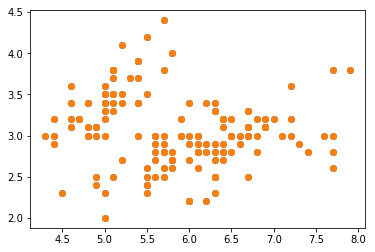

In [30]:
plt.plot(data.sepal_length, data.sepal_width, ls='',
        marker='o', label='sepal')
plt.plot(data.sepal_length, data.sepal_width, ls='',
        marker='o', label='petal')


## Histograms with Matplotlib
Histograms can be created from Panda Series

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

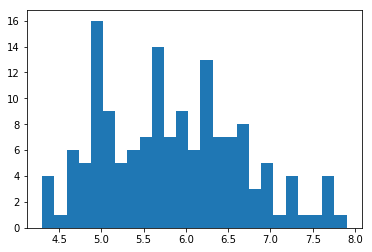

In [31]:
plt.hist(data.sepal_length, bins = 25)

## Customizing Matplotlib Plots
Every feature of Matplotlib plots can be customized

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

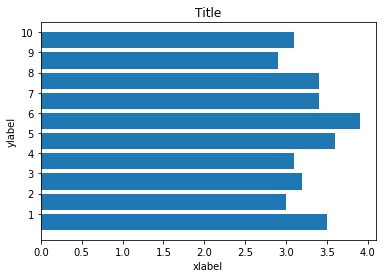

In [32]:
fig, ax = plt.subplots()
ax.barh(np.arange(10), data.sepal_width.iloc[:10])

#set position of ticks and tick labels
ax.set_yticks(np.arange(0.4, 10.4, 1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel',
       title='Title')

## Incorporating Statistical Calculations
Statistical calculations can be included with Pandas methods

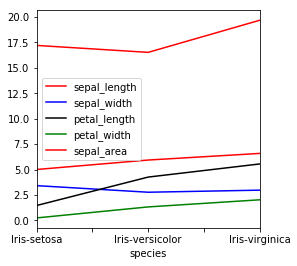

In [33]:
(data.groupby('species').mean().plot
 (color=['red','blue','black','green'],
      fontsize=10.0, figsize=(4,4)))
    

## Statistical Plotting with Seaborn
Joint distribution and scatter plots can be created

C:\Users\InnCreator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


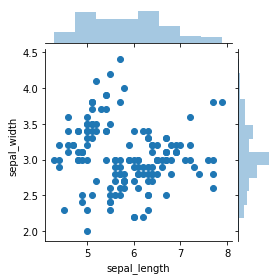

In [34]:
import seaborn as sns

sns.jointplot(x='sepal_length', y='sepal_width',
             data=data, size=4)

Correlation plots of all variables pairs can also be made with Seaborn

C:\Users\InnCreator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


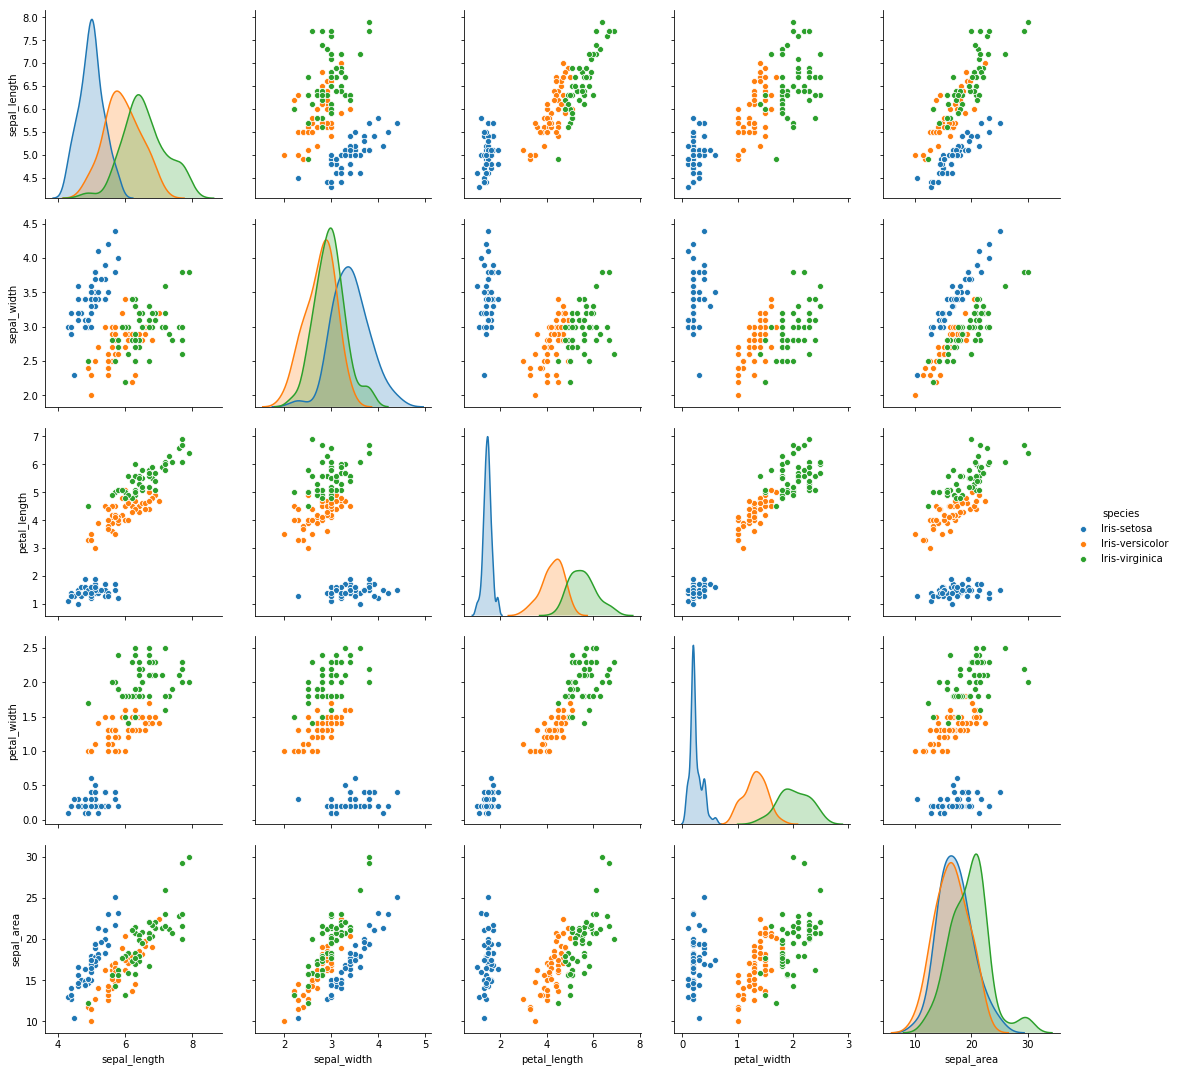

In [35]:
sns.pairplot(data, hue='species', size=3)